In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.optimize
from matplotlib.lines import Line2D
import psycopg2
import matplotlib.patches as mpatches

In [2]:
# Read the CSV file containing firm rankings data into a DataFrame
df_scaled = pd.read_csv("data_files/firm_rankings_FINAL.csv", sep=";")
df_scaled

,co2_rank,nace_id,nace_id_2_digit,nace_desc_2_digit,employees_rank,out_strength_rank,esri_ew_19,esri_ew_rank,esri_ow_19,esri_ow_rank,...,emission_esri_ew_rank,emission_esri_ow_rank,emission_esri_ew_esri_ow_arithmetic_rank,emission_esri_ew_esri_ow_geometric_rank,parent_id,parent_id_desc,color_parent_id,emissions_rel,emissions_rel_industry,emissions_rel_VS_ew_esri
0,14,35.30,35,"Electricity, gas, steam and air conditioning s...",10,12,1.285321e-06,4,2.024942e-06,6,...,2,1,1,1,D,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",tab:orange,0.472081,1.400532,367286.473428
1,52,35.11,35,"Electricity, gas, steam and air conditioning s...",6,8,4.285358e-07,2,8.162105e-07,3,...,3,5,2,2,D,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",tab:orange,0.036529,0.108373,85242.397768
2,4,35.11,35,"Electricity, gas, steam and air conditioning s...",77,37,1.264396e-04,39,2.346506e-05,13,...,6,2,4,3,D,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",tab:orange,2.117219,6.281196,16744.912648
3,58,35.11,35,"Electricity, gas, steam and air conditioning s...",7,13,4.312044e-07,3,1.809773e-06,5,...,4,7,3,4,D,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",tab:orange,0.032336,0.095932,74989.765979
4,57,35.30,35,"Electricity, gas, steam and air conditioning s...",5,31,7.677633e-08,1,1.478849e-05,11,...,1,11,6,5,D,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",tab:orange,0.032372,0.096037,421635.273695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,82,29.32,29,"Manufacture of motor vehicles, trailers and se...",119,64,1.303789e-02,110,2.135850e-02,112,...,115,116,114,115,C,MANUFACTURING,tab:cyan,0.015577,0.046214,1.194781
115,21,49.50,49,Land transport and transport via pipelines,98,113,2.663727e-01,116,2.911898e-01,118,...,116,114,115,116,H,TRANSPORTATION AND STORAGE,tab:red,0.250975,0.744574,0.942197
116,23,20.11,20,Manufacture of chemicals and chemical products,84,108,2.671863e-01,117,2.909432e-01,117,...,117,115,117,117,C,MANUFACTURING,tab:cyan,0.240673,0.714010,0.900770
117,119,16.21,16,Manufacture of wood and of products of wood an...,66,56,4.466129e-04,65,5.063260e-04,57,...,118,117,118,118,C,MANUFACTURING,tab:cyan,0.000354,0.001050,0.792310


In [3]:
# Read result files for different scenarios into DataFrames
df_co2_rank_res = pd.read_csv("data_files/res_co2_rank.csv")
df_employees_res = pd.read_csv("data_files/res_employees_rank.csv")
df_out_strength_res = pd.read_csv("data_files/res_out_strength_rank.csv")
df_esri_ew_res = pd.read_csv("data_files/res_esri_ew_rank.csv")
df_esri_ow_res = pd.read_csv("data_files/res_esri_ow_rank.csv")
df_emission_employees_res = pd.read_csv("data_files/res_emission_employees_rank.csv")
df_emission_out_strength_res = pd.read_csv("data_files/res_emission_out_strength_rank.csv")
df_emission_esri_ew_res = pd.read_csv("data_files/res_emission_esri_ew_rank.csv")
df_emission_esri_ow_res = pd.read_csv("data_files/res_emission_esri_ow_rank.csv")
df_emission_arithmetic_esri_res = pd.read_csv("data_files/res_arithmetic_rank.csv")
df_emission_geometric_esri_res = pd.read_csv("data_files/res_geometric_rank.csv")

# Define scenario names for better readability and interpretation
scenario_names = ["Remove largest emitters first",
                  "Remove least-employees firms first",
                  "Remove least-risky firms first (employment)",
                  "Remove most-CO$_2$-per-employee firms first",
                  "Max. CO$_2$/Min. risk (employment)",
                  "Remove smallest firms first",
                  "Remove least-risky firms first (output)",
                  "Remove most-CO$_2$-per-output firms first",
                  "Max. CO$_2$/Min. risk (output)",
                  "Max. CO$_2$ / Min. risk (employment + output)",
                  "Max. CO$_2$ / Min. risk (employment * output)"]


## FIG 2. CO2 emissions vs. EW-ESRI

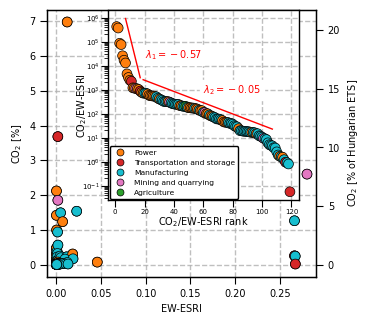

In [4]:
# Define constants for plot formatting
ticks_fontsize = 7
axis_label_fontsize = 7
legend_fontsize = 5.4
scatter_size = 50
scatter_edge_width = 0.5
marker_size = 5
fig_size = (3.46457, 3.46457)
spine_w = 0.2
quantile_ESRI = 0.9
quantile_CO2 = 0.9

major_ticks_len = 5
minor_ticks_len = 3

alpha_background = 0.15
alpha_gridlines = 0.8

# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=fig_size)
axa = ax

# Sort data by a specific column
df_temp = df_scaled.sort_values(by="emissions_rel_VS_ew_esri", ascending=False)

# Set limits and grid properties for axa
axa.set_xlim(-0.01, df_scaled.esri_ew_19.max() + 0.01)
axa.grid(linestyle="--", linewidth=1, alpha=alpha_gridlines)
axa.set_axisbelow(True)

# Set tick parameters and scatter plot properties for axa
axa.tick_params(axis='both', labelsize=ticks_fontsize, length=major_ticks_len)
axa.scatter(df_scaled["esri_ew_19"], df_scaled["emissions_rel"],
            c=df_scaled["color_parent_id"],
            s=scatter_size,
            edgecolor="black", linewidths=scatter_edge_width)
axa.set_ylabel("CO$_2$ [%]", fontsize=axis_label_fontsize)
axa.set_xlabel("EW-ESRI", fontsize=axis_label_fontsize)

# Create a twin axes for axa
axa1 = axa.twinx()
axa1.scatter(df_scaled["esri_ew_19"], df_scaled["emissions_rel_industry"],
             c=df_scaled["color_parent_id"],
             s=scatter_size,
             edgecolor="black", linewidths=scatter_edge_width)
axa1.set_ylabel('CO$_2$ [% of Hungarian ETS]', fontsize=axis_label_fontsize)
axa1.tick_params(axis='both', labelsize=ticks_fontsize, length=major_ticks_len)
axa1.tick_params(which='minor', length=minor_ticks_len)

# Create legend elements
legend_elements = []
# Add legend elements
# 1
temp = Line2D([], [], marker='o', color='w', label="Power", markerfacecolor="tab:orange", markeredgewidth=scatter_edge_width, markeredgecolor="black", alpha=1, markersize=marker_size)
legend_elements.append(temp)
# 2
temp = Line2D([], [], marker='o', color='w', label="Transportation and storage", markeredgewidth=scatter_edge_width, markerfacecolor="tab:red", markeredgecolor="black", alpha=1, markersize=marker_size)
legend_elements.append(temp)
# 3
temp = Line2D([], [], marker='o', color='w', label="Manufacturing", markeredgewidth=scatter_edge_width, markerfacecolor="tab:cyan", markeredgecolor="black", alpha=1, markersize=marker_size)
legend_elements.append(temp)
# 4
temp = Line2D([], [], marker='o', color='w', label="Mining and quarrying", markeredgewidth=scatter_edge_width, markerfacecolor="tab:pink", markeredgecolor="black", alpha=1, markersize=marker_size)
legend_elements.append(temp)
# 5
temp = Line2D([], [], marker='o', color='w', label="Agriculture", markeredgewidth=scatter_edge_width, markerfacecolor="tab:green", markeredgecolor="black", alpha=1, markersize=marker_size)
legend_elements.append(temp)

# Define variables for subplot axb
ymax = max(df_scaled["emissions_rel_VS_ew_esri"])
ymin = min(df_scaled["emissions_rel_VS_ew_esri"])
y_upper = 10
y_lower = 1
left, bottom, width, height = [0.3, 0.33, 0.55, 0.55]
axb = fig.add_axes([left, bottom, width, height])
axb.set_yscale('log')
axb.grid(linestyle="--", linewidth=1, alpha=alpha_gridlines)
axb.set_axisbelow(True)
axb.tick_params(axis='both', labelsize=ticks_fontsize - 2, length=major_ticks_len, pad=1)
axb.tick_params(which='minor', length=minor_ticks_len)

# Scatter plot for axb
axb.scatter(np.arange(1, len(df_temp) + 1), df_temp["emissions_rel_VS_ew_esri"],
            c=df_temp["color_parent_id"],
            s=scatter_size,
            edgecolor='black', linewidths=scatter_edge_width, zorder=3)
axb.set_ylabel("CO$_2$/EW-ESRI", fontsize=axis_label_fontsize, labelpad=-5,
               bbox=dict(facecolor='white', alpha=0))
axb.set_xlabel("CO$_2$/EW-ESRI rank", fontsize=axis_label_fontsize, labelpad=0,
               bbox=dict(facecolor='white', alpha=0))


##### FIT EXPONENTIAL DECAY \lambda_1 & \lambda_2 ####
def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=10000)
    A, K, C = opt_parms
    return A, K, C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

Y1 = df_temp.loc[:,"emissions_rel_VS_ew_esri"].values[:11]
X1 = np.arange(1,len(Y1)+1)

Y2 = df_temp.loc[:,"emissions_rel_VS_ew_esri"].values[11:107]
X2 = np.arange(start = len(X1),stop = (len(Y2)+len(X1)))

A1, K1 = fit_exp_linear(X1,Y1)

A2, K2 = fit_exp_linear(X2,Y2)

props = dict(boxstyle='square', facecolor='white', edgecolor = "white",alpha=1)

axb.plot((X1+6),(2.5*A1)*np.exp(K1*X1),
        c = "red",  linewidth = 1)

## \lambda_1
axb.text(x = 20, y = 20000, s = "$\lambda_1 = {}$".format(np.round(K1,2)), 
         color = "red", bbox = props, fontsize = axis_label_fontsize)

axb.plot((X2+8)[:-7],(2.1*A2)*np.exp(K2*X2)[:-7], 
            color = "red", linewidth = 1)

## \lambda_2 
axb.text(x = 60, y = 700, s = "$\lambda_2 = {}$".format(np.round(K2,2)), 
         color = "red", bbox = props, fontsize = axis_label_fontsize)

# Set spine properties
for axis in ['top', 'bottom', 'left', 'right']:
    axa.spines[axis].set_linewidth(1)
    axa.spines[axis].set_color('black')
    axb.spines[axis].set_linewidth(1)
    axb.spines[axis].set_color('black')

# Add legend to axb
axb.legend(handles=legend_elements, loc=(0.01, 0.01), framealpha=1, fontsize=legend_fontsize,
           edgecolor="black",)

# Set background color for labels
plt.setp(axb.xaxis.get_label(), backgroundcolor="white")
plt.setp(axb.yaxis.get_label(), backgroundcolor="white")

plt.show()
# Save figure
#plt.savefig("final/plots/fig_2_CO2_vs_ESRI_inset_REVISION3_scaled.pdf", dpi=300, bbox_inches='tight')


## Fig 3. Selected Scenarios

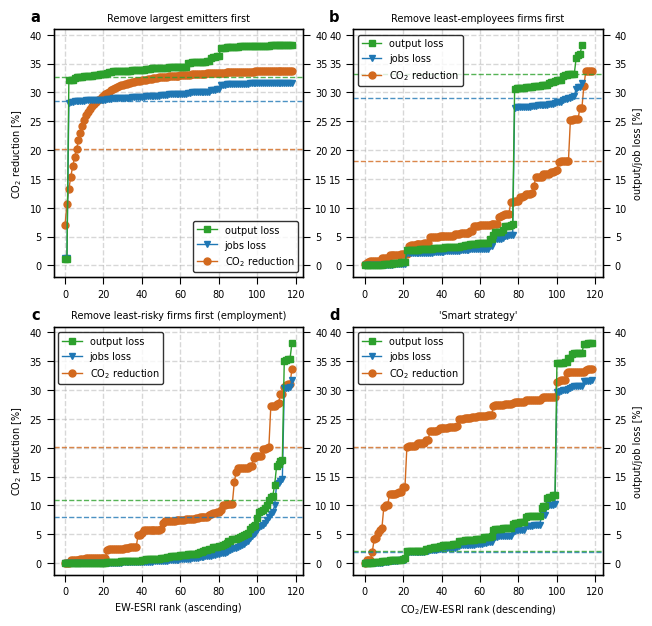

In [5]:
ticks_fontsize = 7
axis_label_fontsize = 7
legend_fontsize = 7
scatter_size = 50
scatter_edge_width = 0.5
marker_size = 5
fig_size = (7.08661, 7.08661)
spine_w = 0.2
quantile_ESRI = 0.9
quantile_CO2 = 0.9

major_ticks_len = 5
minor_ticks_len = 3

alpha_background = 0.15
alpha_gridlines = 0.8


fig, ax = plt.subplots(2,2, figsize = (7.08661, 7.08661))
axa = ax[0][0]
axb = ax[0][1]
axc = ax[1][0]
axd = ax[1][1]


legend_elements = []
#1
temp = Line2D([], [], marker="s", linestyle="-", linewidth = 1, color='tab:green', label="output loss", alpha = 1, markersize= marker_size)
legend_elements.append(temp)
#2
temp = Line2D([], [], marker="v", linestyle = "-", linewidth = 1, color='tab:blue', label="jobs loss",  alpha = 1, markersize= marker_size)
legend_elements.append(temp)
#3
temp = Line2D([], [], marker="o", linestyle = "-", linewidth = 1, color='chocolate', label="CO$_2$ reduction", alpha = 1, markersize= marker_size)
legend_elements.append(temp)

header_list = ["scenario","CO$_2$ saved","EW-ESRI","OW-ESRI","number of firms removed"]
res_list = [header_list]


### CO2 RANK ###
ranking = "co2_rank"
df_temp = df_scaled.sort_values(by = ranking).reset_index()

axa.set_title("Remove largest emitters first", fontsize = axis_label_fontsize)
axa.set_box_aspect(1)
axa.set_ylabel('CO$_2$ reduction [%]', fontsize = axis_label_fontsize)
axa.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "-",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axa.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "",
            marker = "o",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axa.tick_params(axis='y')
axa.grid(linestyle = "--", linewidth = 1, alpha = 0.5)
axa.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axa.set_axisbelow(True)
axa.tick_params(which='minor', length=minor_ticks_len)
axa.set_ylim(-2,41)


axa1 = axa.twinx() 
axa1.plot(np.arange(len(df_co2_rank_res)),df_co2_rank_res["ew_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axa1.plot(np.arange(len(df_co2_rank_res)),df_co2_rank_res["ew_esri_"+ranking]*100, 
            linestyle = "",
            marker = "v",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axa1.tick_params(axis='y')
axa1.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axa1.tick_params(which='minor', length=minor_ticks_len)
axa1.set_ylim(-2,41)


axa2 = axa.twinx() 
axa2.plot(np.arange(len(df_co2_rank_res)),df_co2_rank_res["ow_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axa2.plot(np.arange(len(df_co2_rank_res)),df_co2_rank_res["ow_esri_"+ranking]*100, 
            linestyle = "",
            marker = "s",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axa2.set_yticks([])
axa2.set_ylim(-2,41)

#calculate benchmark
alength = len(df_temp[df_temp["emissions_rel"].cumsum() <= 20])
aprops = dict(boxstyle='round', facecolor='white', alpha=1)
aco2 = np.round(df_temp["emissions_rel"].cumsum()[alength],2)
aesri_ew = np.round(df_co2_rank_res["ew_esri_"+ranking][alength]*100,2)
aesri_ow = np.round(df_co2_rank_res["ow_esri_"+ranking][alength]*100,2)
atextstr = "{} companies targeted\ncum. CO$_2$ [%] = {}\ncombined ESRI = {}".format(alength+1,aco2,aesri_ew,aesri_ow)
# print("A\n",atextstr)
res_list.append(["Remove largest emitters first",aco2,aesri_ew,aesri_ow,alength+1])

axa.axhline(y = aco2, color = "chocolate", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axa1.axhline(y = aesri_ew, color = "tab:blue", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axa2.axhline(y = aesri_ow, color = "tab:green", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axa.legend(handles = legend_elements, loc = (0.56,0.019), edgecolor = "black", fontsize = legend_fontsize)


### EMPLOYEEs RANK ###
ranking = "employees_rank"
df_temp = df_scaled.sort_values(by = ranking)
# remove 5 firms for which no employees number are known
# the respective variable had to be omitted from the original dataset due to data protection reasons
# df_temp = df_temp[df_temp.employees>0].reset_index()

axb.set_title("Remove least-employees firms first", fontsize = axis_label_fontsize)
axb.set_box_aspect(1)
axb.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "-",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axb.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "",
            color = "chocolate",
            marker = "o",
            markersize = marker_size,
            linewidth=1,
        )
axb.tick_params(axis='y')
axb.grid(linestyle = "--", linewidth = 1, alpha = 0.5)
axb.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axb.set_axisbelow(True)
axb.tick_params(which='minor', length=minor_ticks_len)
axb.set_ylim(-2,41)


axb1 = axb.twinx() 
axb1.set_ylabel('output/job loss [%]', color="black", fontsize = axis_label_fontsize)
axb1.plot(np.arange(len(df_employees_res)),df_employees_res["ew_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axb1.plot(np.arange(len(df_employees_res)),df_employees_res["ew_esri_"+ranking]*100, 
            linestyle = "",
            marker = "v",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axb1.tick_params(axis='y')
axb1.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axb1.tick_params(which='minor', length=minor_ticks_len)
axb1.set_ylim(-2,41)


axb2 = axb.twinx() 
axb2.plot(np.arange(len(df_employees_res)),df_employees_res["ow_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axb2.plot(np.arange(len(df_employees_res)),df_employees_res["ow_esri_"+ranking]*100, 
            linestyle = "",
            marker = "s",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axb2.set_yticks([])
axb2.set_ylim(-2,41)


#calculate benchmark
blength = len(df_temp[df_temp["emissions_rel"].cumsum() <= 20])-1
bprops = dict(boxstyle='round', facecolor='white', alpha=1)
bco2 = np.round(df_temp["emissions_rel"].cumsum()[blength],2)
besri_ew = np.round(df_employees_res["ew_esri_"+ranking][blength]*100,2)
besri_ow = np.round(df_employees_res["ow_esri_"+ranking][blength]*100,2)
btextstr = "{} companies targeted\ncum. CO$_2$ [%] = {}\ncombined ESRI = {}".format(blength+1,bco2,besri_ew,besri_ow)
res_list.append(["Remove least-employees firms first",bco2,besri_ew,besri_ow,blength+1])
# print("B\n",btextstr)

axb.axhline(y = bco2, color = "chocolate", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axb1.axhline(y = besri_ew, color = "tab:blue", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axb2.axhline(y = besri_ow, color = "tab:green", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axb2.legend(handles = legend_elements, loc = (0.019,0.77), edgecolor = "black", fontsize = legend_fontsize)


## EW-ESRI RANK ###
ranking = "esri_ew_rank"
df_temp = df_scaled.sort_values(by = ranking).reset_index()

axc.set_title("Remove least-risky firms first (employment)", fontsize = axis_label_fontsize)
axc.set_box_aspect(1)
axc.set_xlabel('EW-ESRI rank (ascending)', fontsize = axis_label_fontsize)
axc.set_ylabel('CO$_2$ reduction [%]', fontsize = axis_label_fontsize)
axc.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "-",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axc.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "",
            marker = "o",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axc.tick_params(axis='y')
axc.grid(linestyle = "--", linewidth = 1, alpha = 0.5)
axc.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axc.set_axisbelow(True)
axc.tick_params(which='minor', length=minor_ticks_len)
axc.set_ylim(-2,41)


axc1 = axc.twinx() 
axc1.plot(np.arange(len(df_esri_ew_res)),df_esri_ew_res["ew_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axc1.plot(np.arange(len(df_esri_ew_res)),df_esri_ew_res["ew_esri_"+ranking]*100, 
            linestyle = "",
            marker = "v",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axc1.tick_params(axis='y')
axc1.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axc1.tick_params(which='minor', length=minor_ticks_len)
axc1.set_ylim(-2,41)


axc2 = axc.twinx() 
axc2.plot(np.arange(len(df_esri_ew_res)),df_esri_ew_res["ow_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:green",
            markersize = np.sqrt(scatter_size),
            linewidth=1,
        )
axc2.plot(np.arange(len(df_esri_ew_res)),df_esri_ew_res["ow_esri_"+ranking]*100, 
            linestyle = "",
            marker = "s",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axc2.set_yticks([])
axc2.set_ylim(-2,41)


#calculate benchmark
clength = len(df_temp[df_temp["emissions_rel"].cumsum() <= 20])
cprops = dict(boxstyle='round', facecolor='white', alpha=1)
cco2 = np.round(df_temp["emissions_rel"].cumsum()[clength],2)
cesri_ew = np.round(df_esri_ew_res["ew_esri_"+ranking][clength]*100,2)
cesri_ow = np.round(df_esri_ew_res["ow_esri_"+ranking][clength]*100,2)
ctextstr = "{} companies targeted\ncum. CO$_2$ [%] = {}\ncombined ESRI = {}".format(clength+1,cco2,cesri_ew,cesri_ow)
res_list.append(["Remove least-risky firms first (employment)",cco2,cesri_ew,cesri_ow,clength+1])
# print("C\n",ctextstr)

axc.axhline(y = cco2, color = "chocolate", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axc1.axhline(y = cesri_ew, color = "tab:blue", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axc2.axhline(y = cesri_ow, color = "tab:green", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axc.legend(handles = legend_elements, loc = (0.019,0.77), edgecolor = "black", fontsize = legend_fontsize)
################################################################################################################


## CO2/EW-ESRI RANK ###
ranking = "emission_esri_ew_rank"
df_temp = df_scaled.sort_values(by = ranking).reset_index()

axd.set_title("\'Smart strategy\'", fontsize = axis_label_fontsize)
axd.set_box_aspect(1)
axd.set_xlabel('CO$_2$/EW-ESRI rank (descending)', fontsize = axis_label_fontsize)
axd.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = "-",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axd.plot(np.arange(len(df_temp)),df_temp["emissions_rel"].cumsum(), 
            linestyle = '',
            marker = "o",
            color = "chocolate",
            markersize = marker_size,
            linewidth=1,
        )
axd.tick_params(axis='y')
axd.grid(linestyle = "--", linewidth = 1, alpha = 0.5)
axd.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axd.set_axisbelow(True)
axd.tick_params(which='minor', length=minor_ticks_len)
axd.set_ylim(-2,41)


axd1 = axd.twinx() 
axd1.set_ylabel('output/job loss [%]', color="black", fontsize = axis_label_fontsize)
axd1.plot(np.arange(len(df_emission_esri_ew_res)),df_emission_esri_ew_res["ew_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )
axd1.plot(np.arange(len(df_emission_esri_ew_res)),df_emission_esri_ew_res["ew_esri_"+ranking]*100, 
            linestyle = "",
            marker = "v",
            color = "tab:blue",
            markersize = marker_size,
            linewidth=1,
        )

axd1.tick_params(axis='both', labelsize=ticks_fontsize, length = major_ticks_len)
axd1.tick_params(which='minor', length=minor_ticks_len)
axd1.set_ylim(-2,41)


axd2 = axd.twinx() 
axd2.plot(np.arange(len(df_emission_esri_ew_res)),df_emission_esri_ew_res["ow_esri_"+ranking]*100, 
            linestyle = "-",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axd2.plot(np.arange(len(df_emission_esri_ew_res)),df_emission_esri_ew_res["ow_esri_"+ranking]*100, 
            linestyle = '',
            marker = "s",
            color = "tab:green",
            markersize = marker_size,
            linewidth=1,
        )
axd2.set_yticks([])
axd2.set_ylim(-2,41)


#calculate benchmark
dlength = len(df_temp[df_temp["emissions_rel"].cumsum() <= 20])
dprops = dict(boxstyle='round', facecolor='white', alpha=1)
dco2 = np.round(df_temp["emissions_rel"].cumsum()[dlength],2)
desri_ew = np.round(df_emission_esri_ew_res["ew_esri_"+ranking][dlength]*100,2)
desri_ow = np.round(df_emission_esri_ew_res["ow_esri_"+ranking][dlength]*100,2)
dtextstr = "{} companies targeted\ncum. CO$_2$ [%] = {}\ncombined ESRI = {}".format(dlength+1,dco2,desri_ew,desri_ow)
res_list.append(["\'Smart strategy\'",dco2,desri_ew,desri_ow,dlength+1])
# print("D\n",dtextstr)

axd.axhline(y = dco2, color = "chocolate", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axd1.axhline(y = desri_ew, color = "tab:blue", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axd2.axhline(y = desri_ow, color = "tab:green", alpha = alpha_gridlines, linestyle = "--", linewidth = 1)
axd2.legend(handles = legend_elements, loc = (0.019,0.77), edgecolor = "black", fontsize = legend_fontsize)


for axis in ['top', 'bottom', 'left', 'right']:
    axa.spines[axis].set_linewidth(1)
    axa.spines[axis].set_color('black')
    
    axb.spines[axis].set_linewidth(1)
    axb.spines[axis].set_color('black')    
    
    axc.spines[axis].set_linewidth(1)
    axc.spines[axis].set_color('black')   
    
    axd.spines[axis].set_linewidth(1)
    axd.spines[axis].set_color('black')   

# add letters
xpos, ypos = -0.055, 1.08

def insert_letter(a, lett):
    a.text(xpos, ypos,lett,
           fontdict={ 'size':str(1.5*axis_label_fontsize)}, transform=a.transAxes,
          zorder=100000, va='top', ha='right', weight='bold')
    
for a,l in zip([axa,axb,axc,axd],['a','b','c','d']):
    insert_letter(a,l)

# plt.savefig("final/plots/fig_3_hungary_shutdown_strategies_lineplot_REVISION3_scaled.pdf", dpi = 300, bbox_inches='tight')

plt.show()
